In [17]:
import pandas as pd
import numpy as np
import requests

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
local_path = "./car_prices.csv"

request = requests.get(url)

if(request.status_code == 200):
    with open(local_path, 'wb') as file:
        file.write(request.content)
    print('Success download file')
else:
    print(f"Error, status code: {request.status_code}")

path = "car_prices.csv"

Success download file


In [19]:
df = pd.read_csv(path)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

<div style="margin-top: 20px">
<h3>Question  #1:</h3>

<b>What is the data type of the column "peak-rpm"? </b>
</div>


In [21]:
df['peak-rpm'].dtype

dtype('float64')

In [22]:
numeric_columns = df.select_dtypes(include='number')
numeric_columns.corr() #Corelation

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


<h3> Question  #2: </h3>

<p>Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[['bore','stroke','compression-ratio','horsepower']]</p>
</div>


In [23]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2>Continuous Numerical Variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well. </p>

<h3>Positive Linear Relationship</h4>
Let's find the scatterplot of "engine-size" and "price".

(0.0, 53291.01904766956)

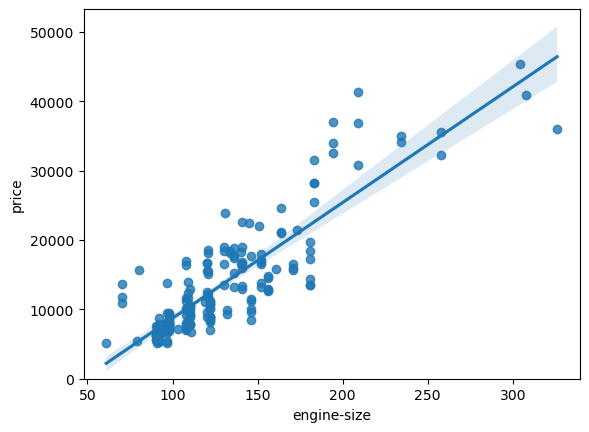

In [24]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0, )

In [25]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

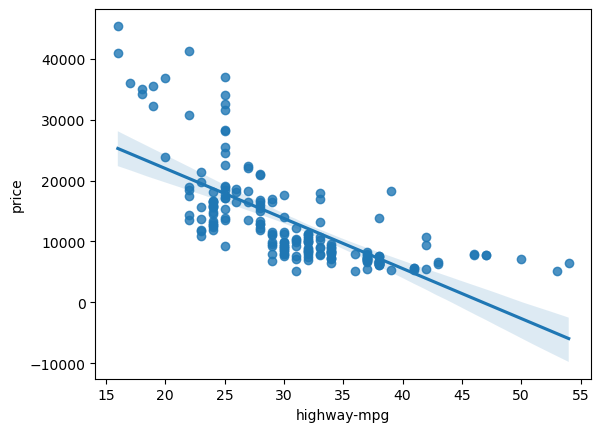

In [26]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [27]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

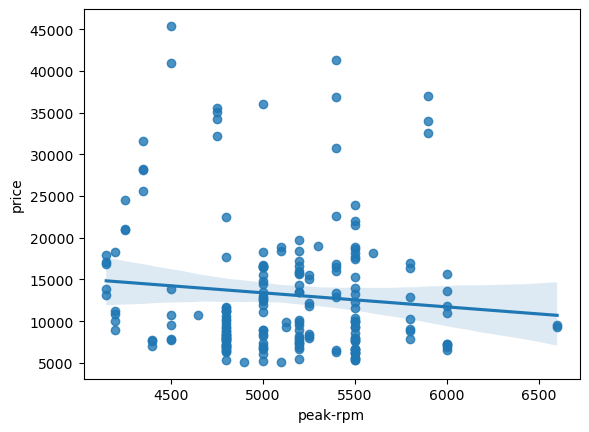

In [28]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [29]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<h1> Question  3 a): </h1>

<p>Find the correlation  between x="stroke" and y="price".</p>
<p>Hint: if you would like to select those columns, use the following syntax: df[["stroke","price"]].  </p>
</div>


In [30]:
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<h1>Question  3 b):</h1>

<p>Given the correlation results between "price" and "stroke", do you expect a linear relationship?</p> 
<p>Verify your results using the function "regplot()".</p>
</div>


<Axes: xlabel='stroke', ylabel='price'>

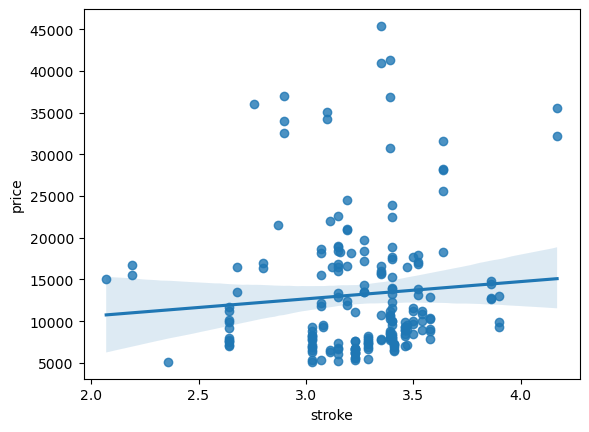

In [31]:
sns.regplot(x="stroke", y="price", data=df)

<h3>Categorical Variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>


Let's look at the relationship between "body-style" and "price".

c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='body-style', ylabel='price'>

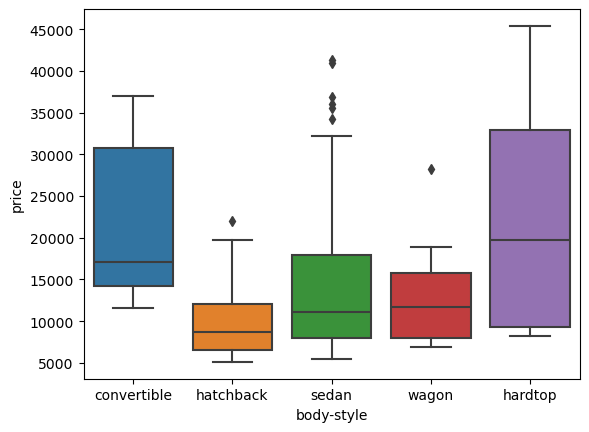

In [32]:
sns.boxplot(x="body-style", y="price", data=df)